# Data and AI Training for Ext-LT Deep Learning Computer vision Hands-on Excersise
## Predicting dog or cat in the image

In [121]:
#install required libraries
#!pip install tensorflow
#!pip install keras
#pip install opencv-python

In [122]:
import cv2
import tensorflow
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
#import PIL as it is needed to read the images from github for inference
from PIL import Image
from urllib import request
from io import BytesIO

In [123]:
base_url="https://github.com/vallerivinodh/AI-Examples"

In [124]:
def loadModel(modelUrl):
  url = base_url+modelUrl
  print(url)
  urllib.request.urlretrieve(
        url, 'model.h5')
  
  model_file_path = './model.h5'
  model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(
    model_file_path,
    monitor="val_loss",
    save_best_only=True,
    mode="min",
  )
  return load_model(model_file_path)

In [125]:
def predictImages(model, imageBaseUrl,rangeVal,rows,columns):
  fig=plt.figure(figsize=(15, 6))
  url = base_url+imageBaseUrl
  #Prediction of image
  for i in range(rangeVal):
    fig.add_subplot(rows, columns, i+1)
    #url = source_url+"/blob/main/Deep-Learning/TestData/{}.jpg?raw=true".format(i+1)
    res = request.urlopen(url.format(i+1)).read()
    Sample_Image = Image.open(BytesIO(res)).resize((64,64))
    img = image.img_to_array(Sample_Image)
    img = img/255
    # create a batch of size 1 [N,H,W,C]
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(np.asarray(img), batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

    plt.imshow(Sample_Image)

In [126]:
def flipTheImageAndPredict(model, imageBaseUrl):
  imgToBeRotatedAndPredicted = input("Enter the image to be fliped and predicted[1-21] ")
  url = base_url+imageBaseUrl
  res = request.urlopen(url.format(imgToBeRotatedAndPredicted)).read()
  Sample_Image = Image.open(BytesIO(res)).resize((64,64))
  Sample_Image = np.array(Sample_Image)
  image = cv2.flip(Sample_Image, 1)
  img = image/255
  img = np.expand_dims(img, axis=0)
  prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
  if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
  else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
  plt.imshow(image)

In [127]:
def rotateTheImageAndPredictCustom(model, imageBaseUrl):
  imgToBeRotatedAndPredicted = input("Enter the image to be rotated and predicted[1-21] ")
  url = base_url+imageBaseUrl
  res = request.urlopen(url.format(imgToBeRotatedAndPredicted)).read()
  Sample_Image_rotated = Image.open(BytesIO(res)).resize((64,64))
  Sample_Image_rotated = np.array(Sample_Image_rotated)
  rotate_90 = cv2.rotate(Sample_Image_rotated, cv2.ROTATE_90_CLOCKWISE) 
  rotate_90_counter = cv2.rotate(Sample_Image_rotated, cv2.ROTATE_90_COUNTERCLOCKWISE) 
  rotate_180 = cv2.rotate(Sample_Image_rotated, cv2.ROTATE_180) 
  rotated_images =[rotate_90,rotate_90_counter,rotate_180]
  for img in rotated_images:
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
      value ='Dog :%1.2f'%(prediction[0,0])
      plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
      value ='Cat :%1.2f'%(1.0-prediction[0,0])
      plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(np.squeeze(img))
    plt.show()

# Predict the image on 20 images trained model

## Loading the model from pre-saved model

In [128]:
# Loading the model which is trained on 20 images
classifier =  loadModel('/blob/main/Deep-Learning/models/dog_cat_model_Final_20Images_dataset.h5?raw=true')

https://github.com/vallerivinodh/AI-Examples/blob/main/Deep-Learning/models/dog_cat_model_Final_20Images_dataset.h5?raw=true


### Predict the images from the test data set
### Args are the
#### Model : Loaded model
#### TestImagesPath : Test Images Path
#### NoOfImages to Predict : Modify the number [1-21] for testing (You can play around by changing values)
#### rows : Used for plotting graph 
#### column : Used for plotting graph 

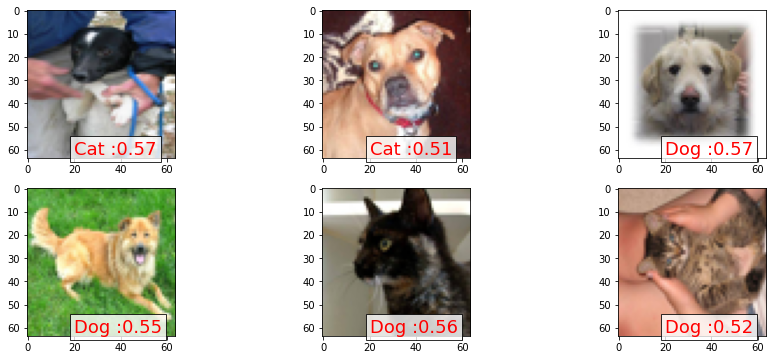

In [129]:
#Predict the images from the test data set using the 20 image trained model -- Prediting for 6 images out of 21
predictImages(classifier,'/blob/main/Deep-Learning/TestData/{}.jpg?raw=true',6,2,3) 

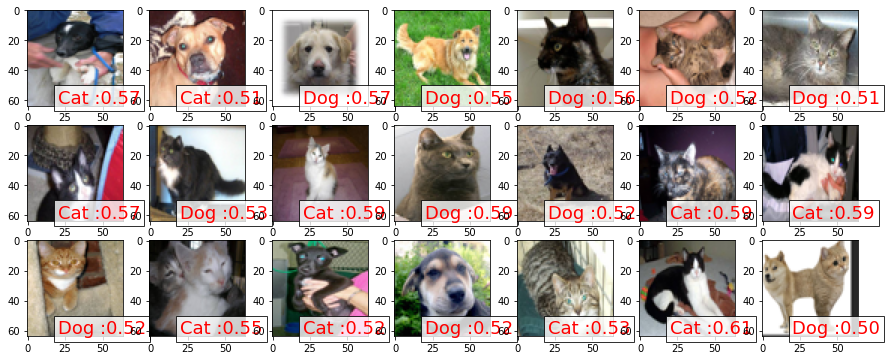

In [130]:
#test the model on sample 21 images and we can observe that model which is trained on 20 images is not prediciting accurately 
predictImages(classifier,'/blob/main/Deep-Learning/TestData/{}.jpg?raw=true',21,3,7)

Enter the image to be fliped and predicted[1-21] 12


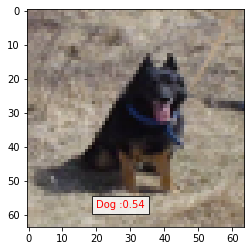

In [133]:
# Flip the actual image and see the prediction - Enter the value in the input box when it prompts
flipTheImageAndPredict(classifier,'/blob/main/Deep-Learning/TestData/{}.jpg?raw=true')

Enter the image to be rotated and predicted[1-21] 12


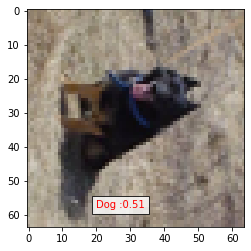

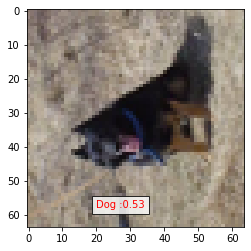

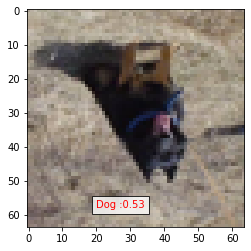

In [134]:
# rotateTheImageAndPredict with 20 Image trained model
rotateTheImageAndPredictCustom(classifier,'/blob/main/Deep-Learning/TestData/{}.jpg?raw=true')

# Predict with 100 images Trained model

### Loading the 100 images trained model

In [135]:
hun_img_classifier =  loadModel('/blob/main/Deep-Learning/models/dog_cat_model_Final_fulldatset.h5?raw=true')

https://github.com/vallerivinodh/AI-Examples/blob/main/Deep-Learning/models/dog_cat_model_Final_fulldatset.h5?raw=true


### Predict the images from the test data set
### Args are the
#### Model : Loaded model
#### TestImagesPath : Test Images Path
#### NoOfImages to Predict : Modify the number [1-21] for testing (You can play around by changing values)
#### rows : Used for plotting graph 
#### column : Used for plotting graph 

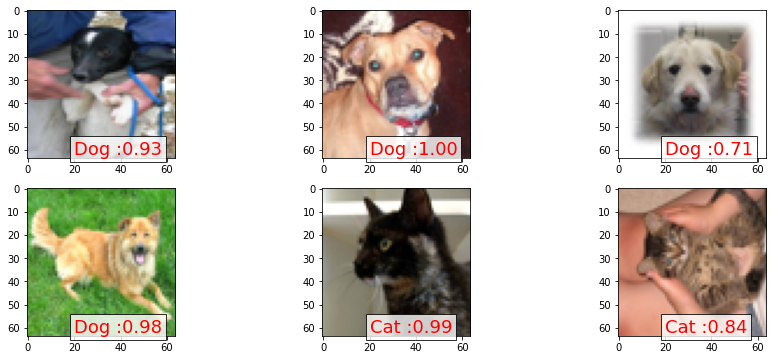

In [136]:
predictImages(hun_img_classifier,'/blob/main/Deep-Learning/TestData/{}.jpg?raw=true',6,2,3) 

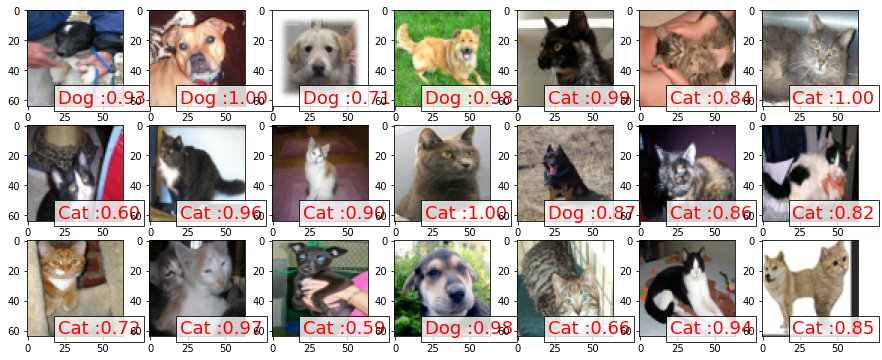

In [137]:
#test the model on sample 20 images and we can observe that model which is trained on 100 images is not prediciting accurately 
predictImages(hun_img_classifier,'/blob/main/Deep-Learning/TestData/{}.jpg?raw=true',21,3,7)

Enter the image to be fliped and predicted[1-21] 12


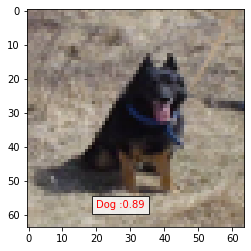

In [138]:
# flipTheImageAndPredict with 100 Image trained model
flipTheImageAndPredict(hun_img_classifier,'/blob/main/Deep-Learning/TestData/{}.jpg?raw=true')

Enter the image to be rotated and predicted[1-21] 21


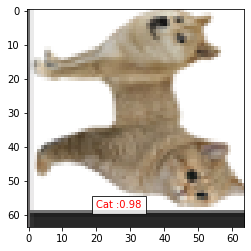

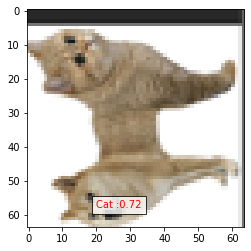

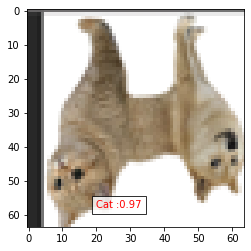

In [139]:
rotateTheImageAndPredictCustom(hun_img_classifier,'/blob/main/Deep-Learning/TestData/{}.jpg?raw=true')